# Çoklu Lineer Regresyon Proje

## Araba Fiyat Tahmini

### Problem Tanımı:

1980'lerde Uzakdoğu'dan bir araba üreticisi, Amerika pazarına girmek istemektedir.

Araba fiyatları üzerinde hangi faktörlerin önemli olduğunu öğrenmek için bir danışmanlık firması ile anlaşırlar.

Öğrenmek istedikleri:
* Arabaların fiyatlarını belirlemede hangi değişken/değişkenler önemlidir
* Bu değişkenler, araba fiyatlarını ne ölçüde etkilemektedir.

Bu talepler doğrultusunda, danışmanlık firması çeşitli markalar ve modeller üzerinden veriler toplamıştır.

Bizim görevimiz fiyatın hangi değişkenlere göre ve ne ölçüde değiştiğini gösteren bir model hazırlamak ve sunmaktır.

https://archive.ics.uci.edu/ml/datasets/Automobile

#### Kütüphaneleri import edelim

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
# warning mesajları için
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#### Veriyi Anlayalım

In [108]:
df = pd.read_csv('Automobile.csv')

In [109]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [110]:
# genel bilgiler

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [111]:
# numerik kolonlara ait istatistik

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [112]:
# verinin şekli (satır, sütun)

df.shape

(205, 26)

In [113]:
# toplam gözlem sayısı (n)

len(df)

205

In [114]:
# sütunlar

df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [115]:
# toplam sütun sayısı

len(df.columns)

26

In [116]:
# kaç adet numerik sütun var
# price (y) da numerik bir sütun

len(df.describe().columns)

16

Dolayısı ile data içinde:
* Toplam 26 sütun var
* Bunlardan 25'i girdi (input) sütunları, 1'i çıktı (y) sütunu
* Girdi sütunlarının 15'i sayısal sütun, 10'u kategorik

In [117]:
df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Veri Ön İşleme

In [118]:
# her sütun içindeki tekil (unique) veri adedini görelim

for col in df.columns:
    print(col, df[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [119]:
# Kategorik olan sütunlar için değerleri görelim

for col in df.columns:
    values = []
    
    # numerik olmayanlar -> kategorik
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        
        print("{0} -> {1}".format(col, values))
        

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [120]:
# Model adlarını görelim
# data['CarName']

df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Gördüğünüz gibi model adları çok karmaşık. İlk kelimeler üretici adı, diğerleri model adı.

Üretici Adı - Model Adı şeklinde ayırıp Üretici Adlarını alalım.

In [121]:
manufacturer = df['CarName'].apply(lambda x: x.split(' '))
manufacturer

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [122]:
manufacturer = df['CarName'].apply(lambda x: x.split(' ')[0])
manufacturer

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [123]:
# şimdi df'i kopyalayıp üzerinde değişiklik yapmaya başlayalım

data = df.copy()

In [124]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [125]:
# bu CarName sütununu data'dan çıkaralım

data.drop(columns=['CarName'], axis=1, inplace=True)

In [126]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [127]:
# şimdi bu yeni manufacturer sütununu ekleyelim

data.insert(3, 'manufacturer', manufacturer)

In [128]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [129]:
# hangi üreticinin kaç adet aracı var görelim

data.groupby(by='manufacturer').count()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Üretici adlarında hatalar var
* toyota, toyouta
* mazda, maxda
* Nissan, nissan
* ...

Bunları düzeltelim:

In [130]:
# önce tüm değerleri görelim

data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [131]:
# büyük - küçük harfleri düzeltelim

data.manufacturer = data.manufacturer.str.lower()

In [132]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [133]:
# hatalı marka adlarını düzeltelim

data.replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'vw',
    'volkswagen': 'vw'
}, inplace=True)

In [134]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [135]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Tekli (Univariate) Analiz

Değişkenlere tek tek kendi içlerinde bakıp nasıl göründüğünü inceleyelim:

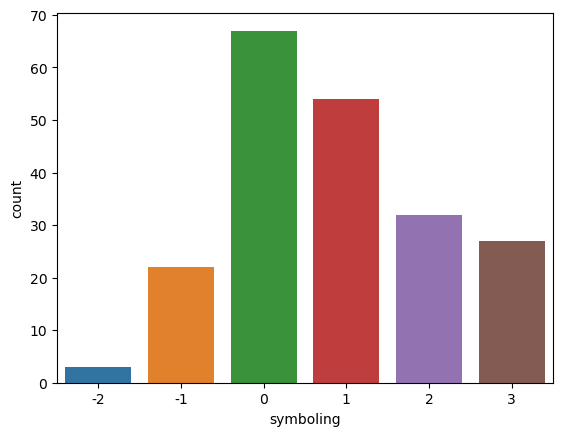

In [136]:
# symboling -> sigorta riski

sns.countplot(data=data, x="symboling")
plt.show()

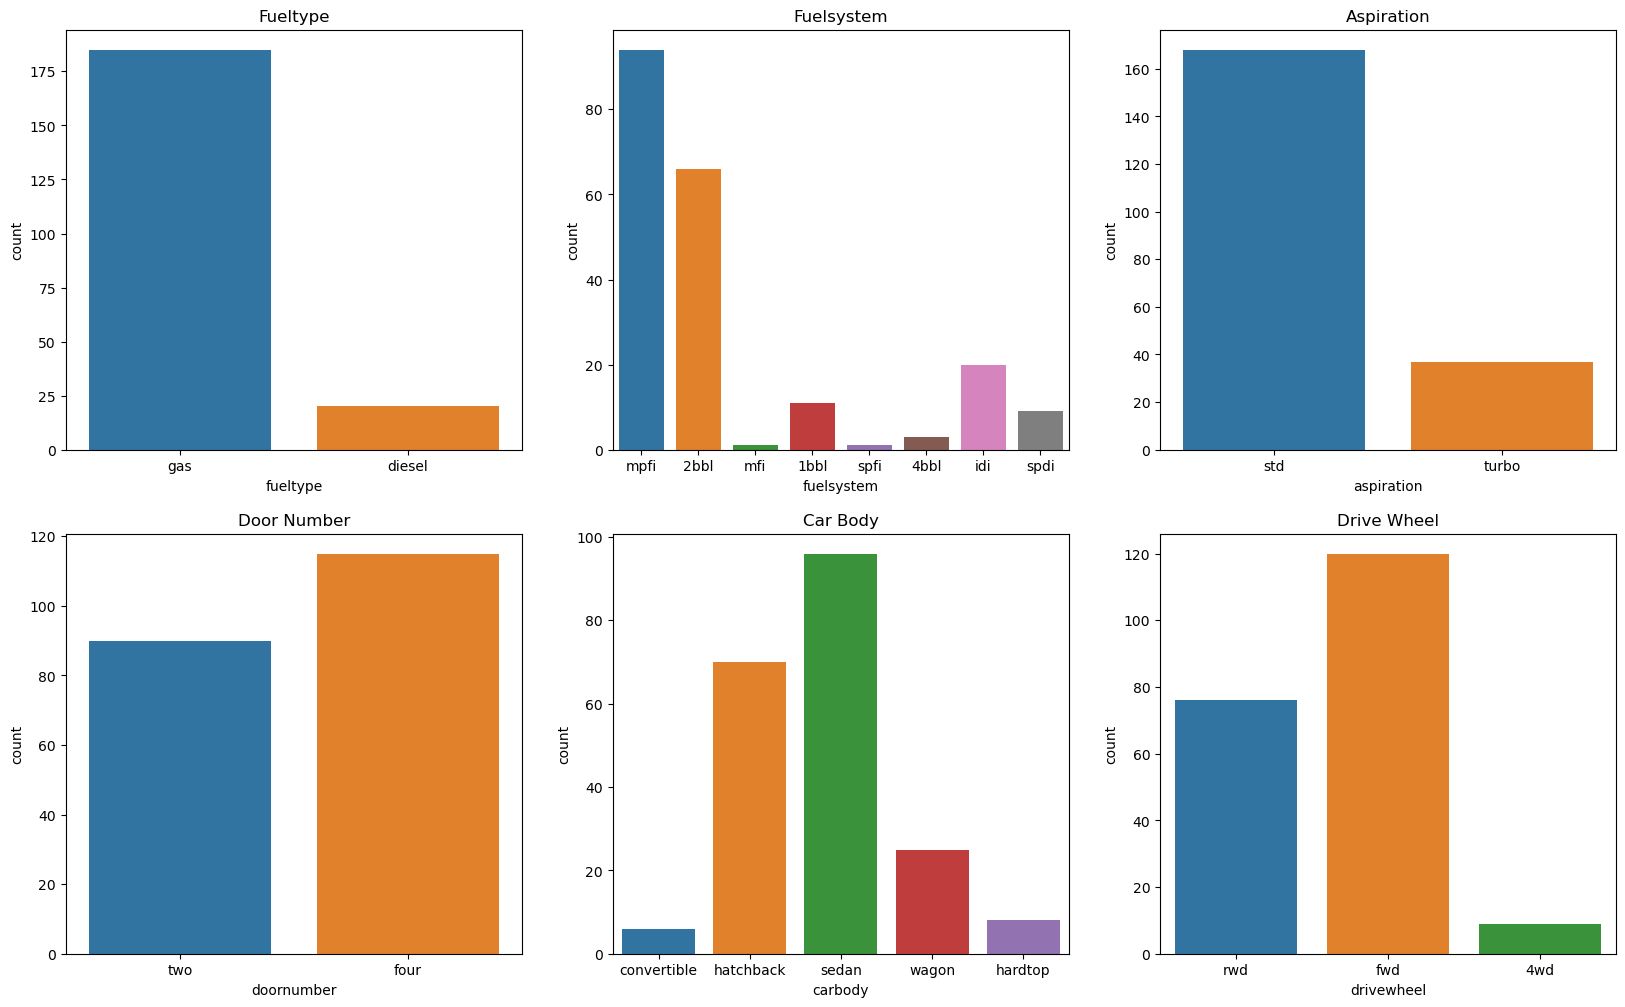

In [137]:

fig = plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.title('Fueltype')
sns.countplot(data=data, x='fueltype')
# benzinli (gas) arabalar çoğunlukta

plt.subplot(2, 3, 2)
plt.title('Fuelsystem')
sns.countplot(data=data, x='fuelsystem')
# mpfi (multi point fuel injection) en çok tercih edilen, yeni teknoloji

plt.subplot(2, 3, 3)
plt.title('Aspiration')
sns.countplot(data=data, x='aspiration')
# çoğunluk standart beslemeli

plt.subplot(2, 3, 4)
plt.title('Door Number')
sns.countplot(data=data, x='doornumber')
# çoğunluk 4 kapılı

plt.subplot(2, 3, 5)
plt.title('Car Body')
sns.countplot(data=data, x='carbody')
# çoğunluk sedan

plt.subplot(2, 3, 6)
plt.title('Drive Wheel')
sns.countplot(data=data, x='drivewheel')
# çekiş sistemi, standart çeker çoğunlukta

plt.show()

#### İkili (Bivariate) Analiz

Şimdi değişkenlerin Fiyat'ı nasıl etkilediğini görmeye çalışalım:

In [138]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


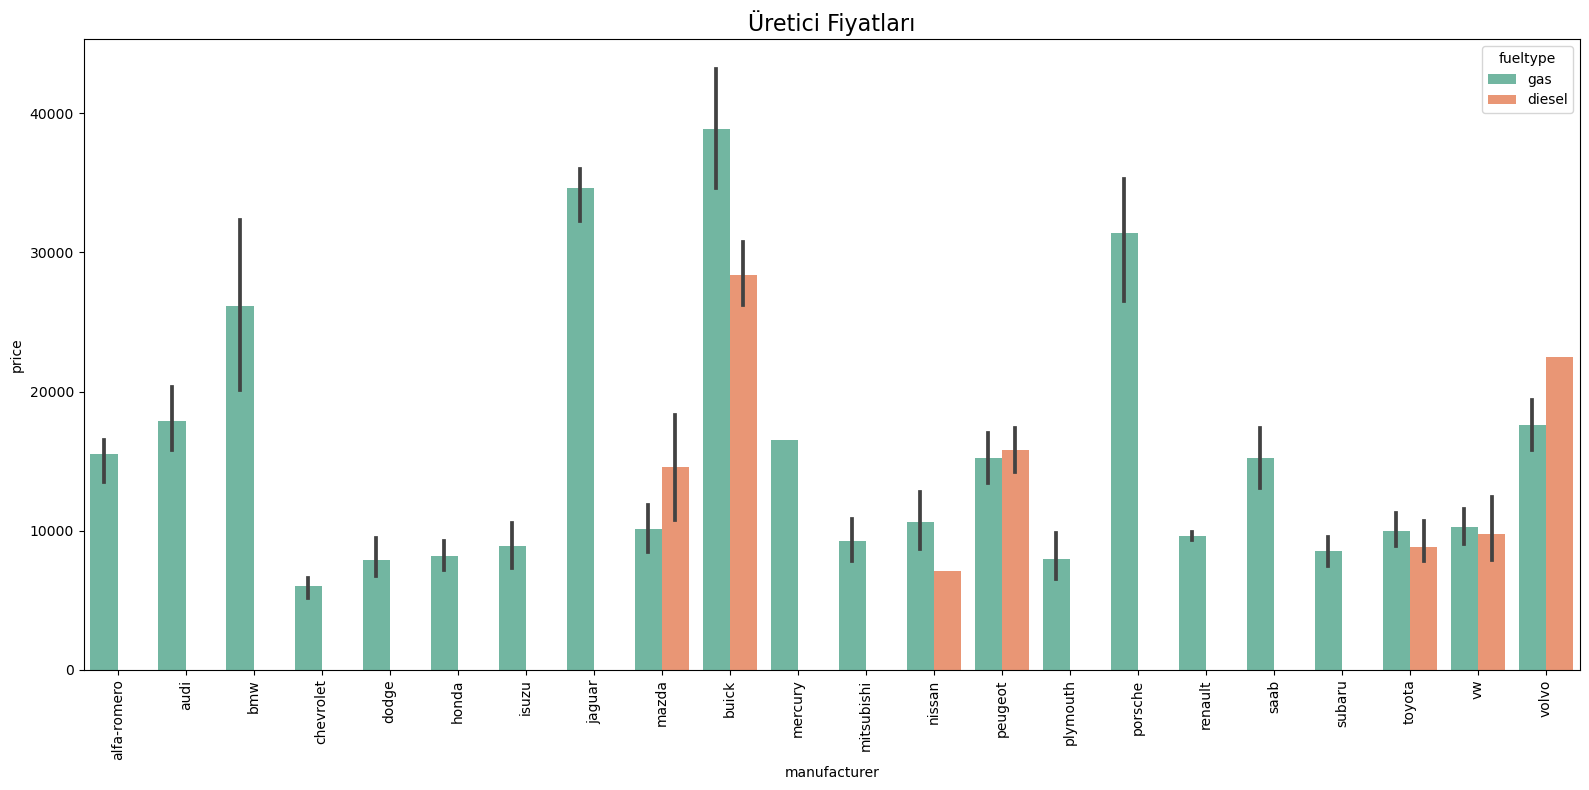

In [139]:
# Üretici bazlı ortalama fiyatlar

plt.figure(figsize=(16,8))
plt.title('Üretici Fiyatları', fontsize=16)
sns.barplot(x=data.manufacturer, y=data.price, 
            hue=data.fueltype, palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()

**symboling:**

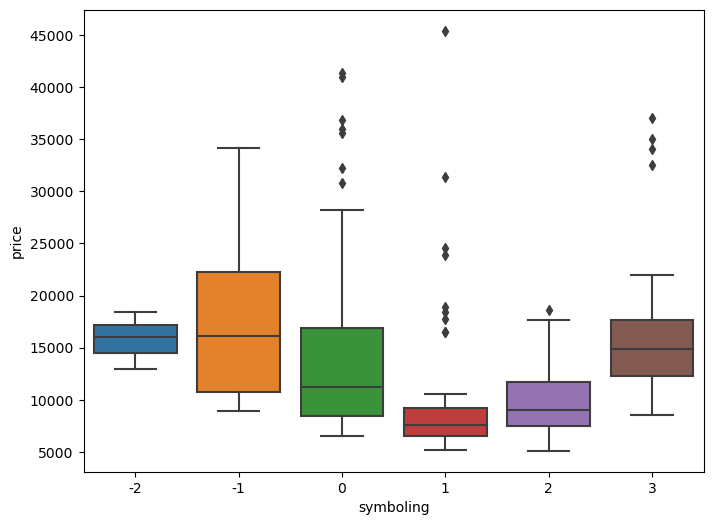

In [140]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data.symboling, y=data.price)
plt.show()

**fueltype:**

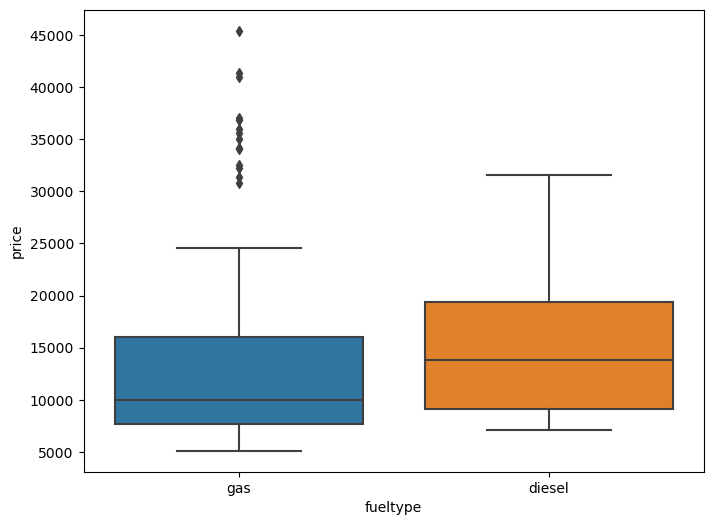

In [141]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data.fueltype, y=data.price)
plt.show()

**enginelocation:**

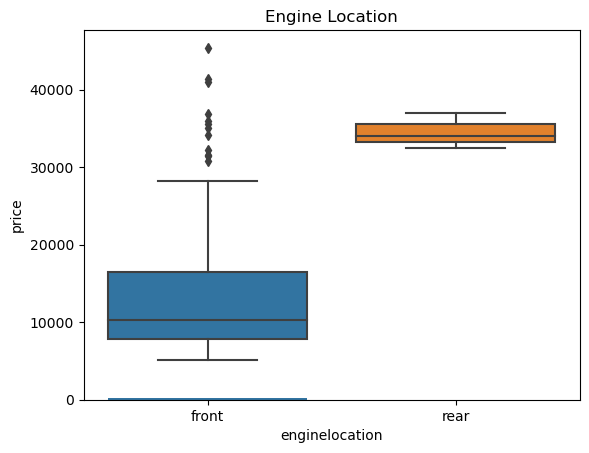

In [142]:
plt.title('Engine Location')
sns.countplot(data=data, x="enginelocation")
sns.boxplot(x=data.enginelocation, y=data.price)
plt.show()

# çoğunlukla motoru önde olan arabalar var ve fiyatları daha düşük
# motor arkada ise fiyat çok yüksek oluyor


**cylindernumber:**

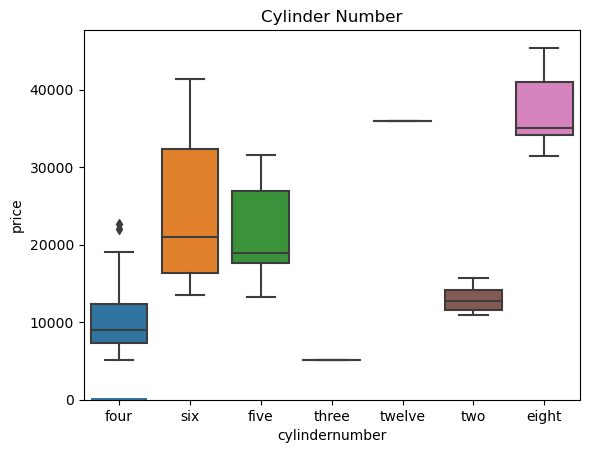

In [143]:
plt.title('Cylinder Number')
sns.countplot(data=data, x="cylindernumber")
sns.boxplot(x=data.cylindernumber, y=data.price)
plt.show()

# silindir sayısı arttıkça fiyatın görece arttığını söyleyebiliriz
# bakalım ne kadar dörğru çıkacak


**Fiyatın Kendi İçinde Dağılımı:**

Şimdi sadece fiyatın nasıl kümelendiğine bakalım:

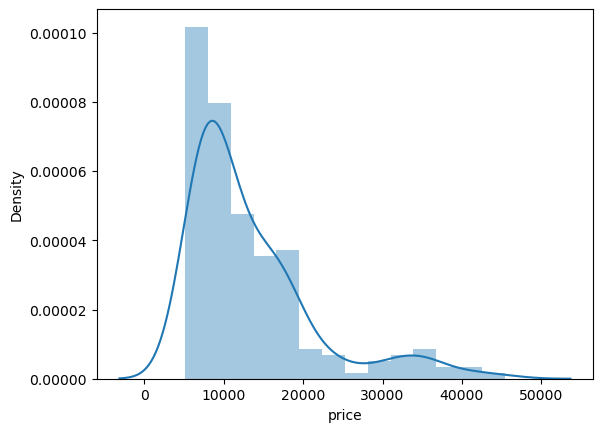

In [144]:
sns.distplot(data.price)
plt.show()

# fiyatın genelde 5.000 ile 20.000 USD arasında dağıldığı görülüyor


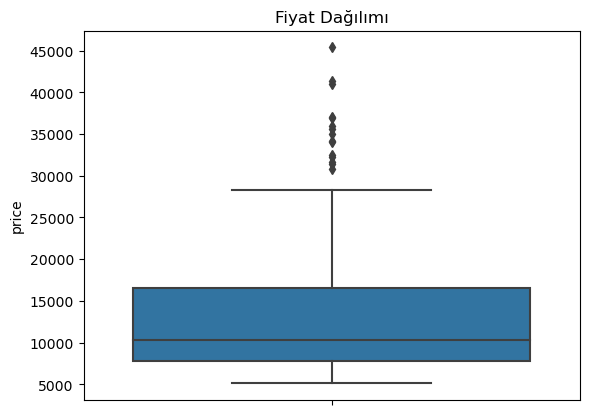

In [145]:

plt.title('Fiyat Dağılımı')
sns.boxplot(y=data.price)
plt.show()

# buradan da çok net bir şekilde dağılımın aralığı görülüyor


In [146]:
# fiyata istatistik veriler üzerinden bakalım

data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Şimdi ikili grafiklerle (pair-plot) olarak tümünü görelim:

In [147]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [148]:
# sadece şunları alalım

cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
        'curbweight', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [149]:
len(cols)

13

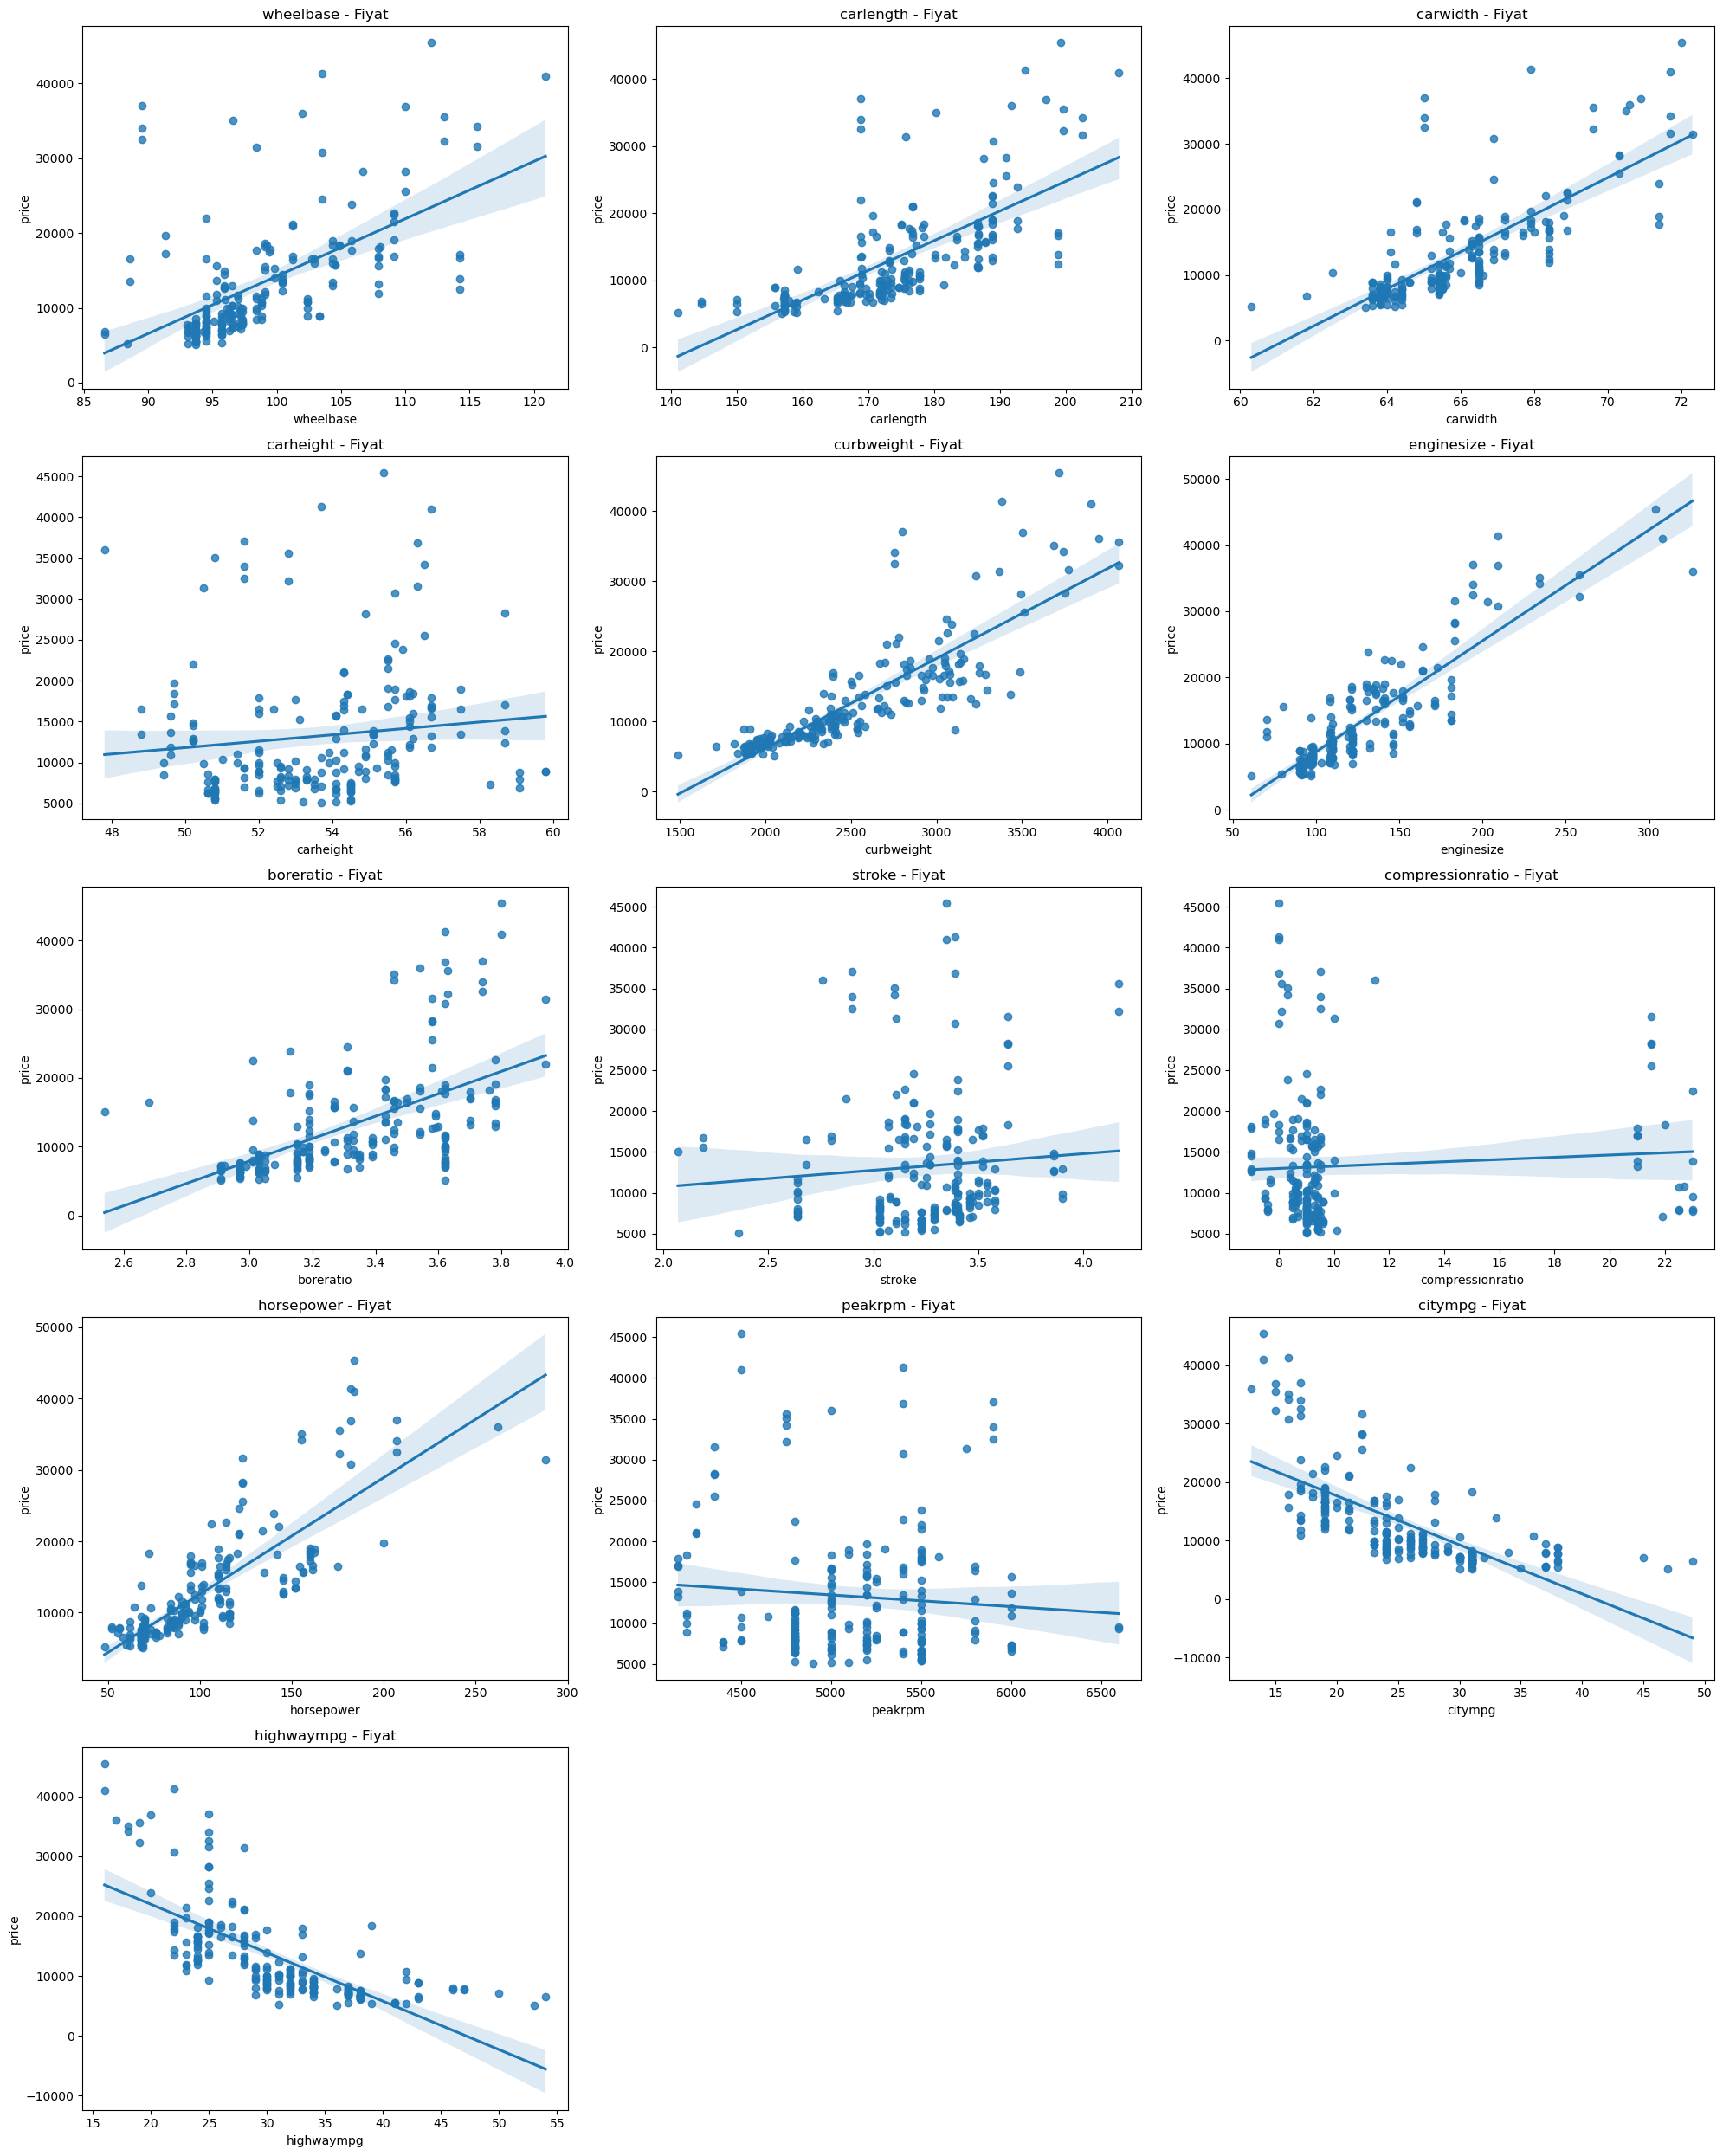

In [150]:
# regresyon doğruları ile ilişkiyi görelim

plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=eval('data' + '.' + cols[i]), y=data.price)
    
plt.tight_layout()

Burada nerdeyse tüm değişkenleri önemli. Yani fiyat üzerinde etkisi olabilir.

Etkisiz olanlar:
* carheight
* stroke
* compression ratio
* peak rpm
* highway mpg
* city mpg

Bunları çıkarabiliriz.

In [151]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [152]:
# yeni sütunlarla yeni data

data_new = data[[
        'car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [153]:
data_new.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


Şimdi data_new içindeki tüm sütunlara ikili olarak (pair-plot) bakalım:

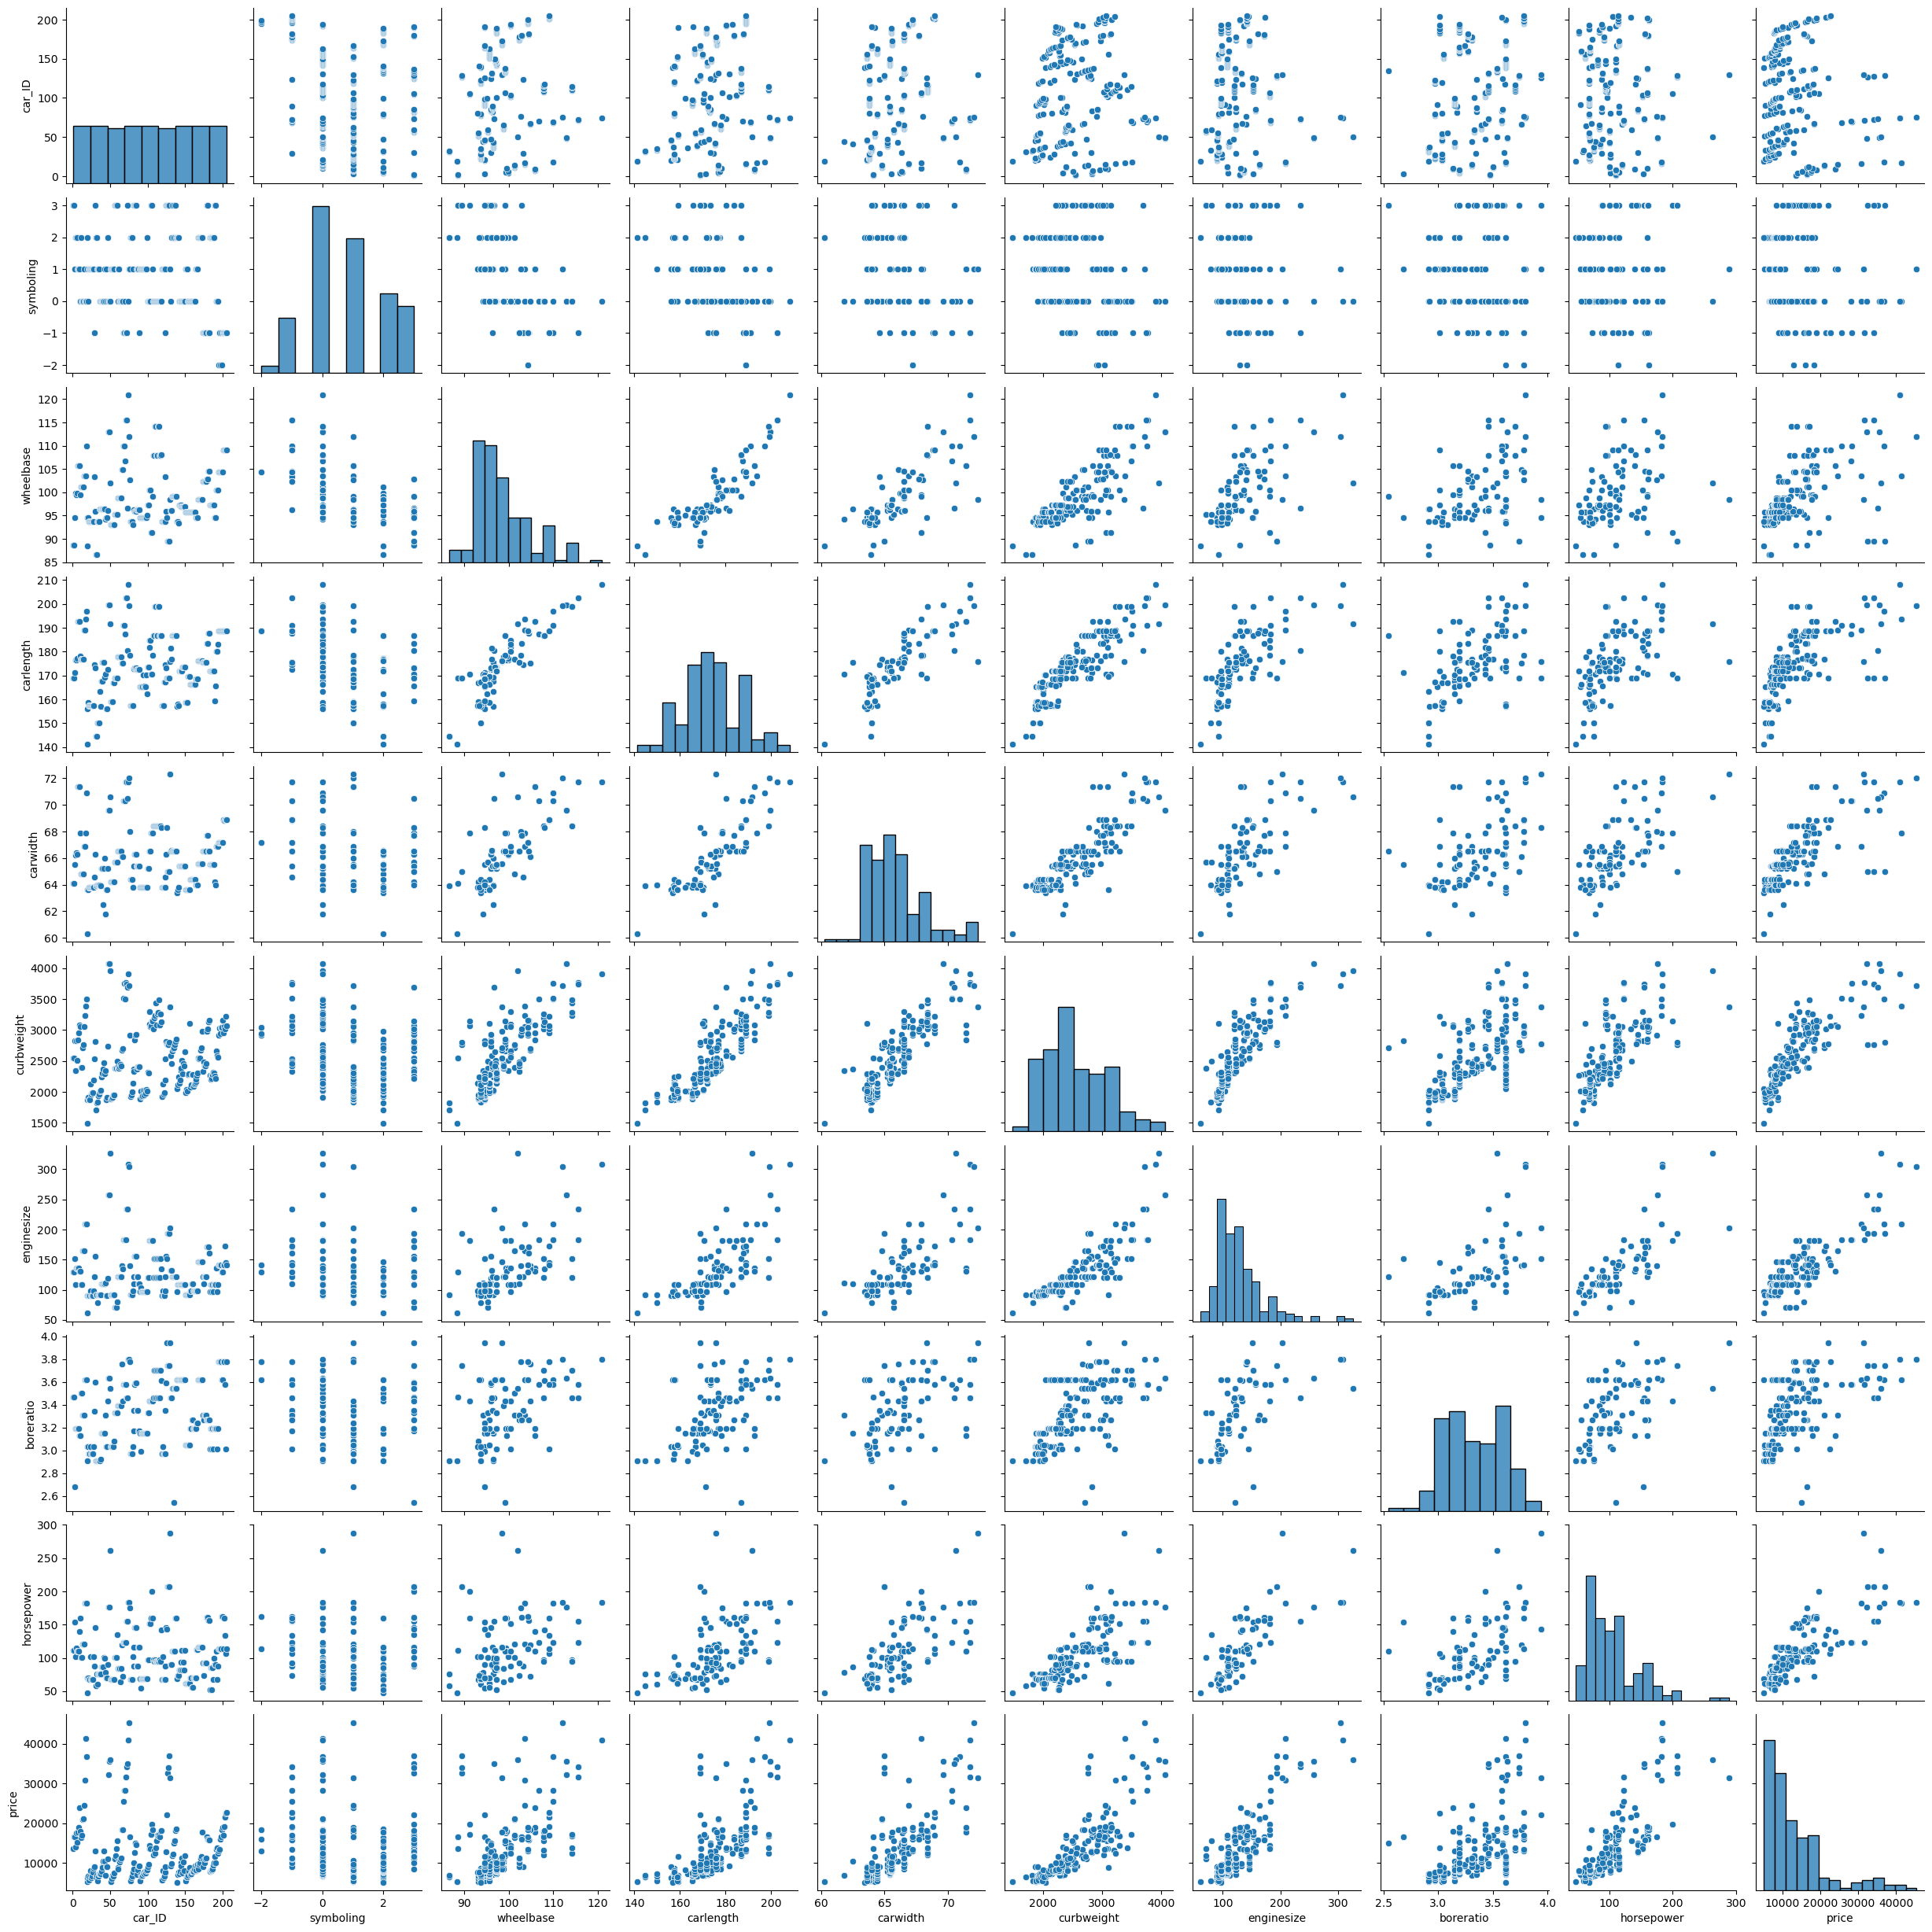

In [154]:
sns.pairplot(data_new)
plt.show()

#### Feature Engineering

Datayı daha iyi modellemek için yeni özellikler (feature) bulma veya özelliklerden bazılarını eleme işine **Feature Engineering** denir.

**Tork (Torque)**: 

Tork, motorun dönme kuvvetinin; araçta tekerlekleri itme kuvvetine dönüştürülmesini sağlamaktadır. Yani bir nevi, aracın çekiş gücü ile ilgilidir. 

Dolayısı ile Tork'u yüksek olan arabaların daha pahalı olması beklenebilir.

**Torque = 5252 x HP / RPM**

In [155]:
torque = data.horsepower * 5252 / data.peakrpm

In [156]:
torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Length: 205, dtype: float64

In [157]:
# dataya torque sütunu ekle

data.insert(10, 'torque', 
            pd.Series(data.horsepower * 5252 / data.peakrpm, index=data.index))

In [158]:
data.torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Name: torque, Length: 205, dtype: float64

Torque ile Fiyat arasındaki ilişkiye bakalım:

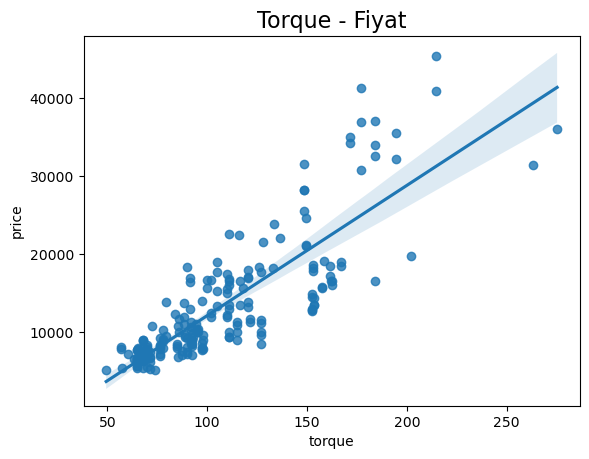

In [159]:
plt.title('Torque - Fiyat', fontsize=16)

sns.regplot(x=data.torque, y=data.price)

plt.show()

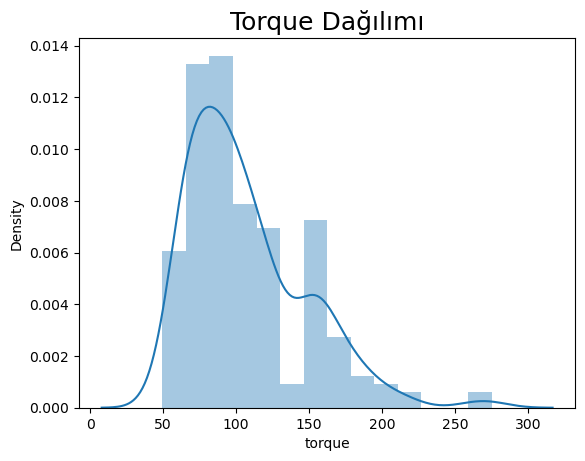

In [160]:
# Torque dağılımını görelim

plt.title('Torque Dağılımı', fontsize=18)
sns.distplot(data.torque)

plt.show()

**Yakıt Ekonomisi**:

Arabanın şehir içinde ve şehir dışında ortalama yakıt tüketimi.

In [161]:
data['fueleconomy'] = (0.55 * data.citympg) + (0.45 * data.highwaympg)

In [162]:
data.fueleconomy

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: fueleconomy, Length: 205, dtype: float64

Son olarak model için önemli değişkenleri bırakıp diğerlerini silelim:

In [163]:
# silinecekleri sil

data.drop(columns=['car_ID','manufacturer','doornumber','carheight',
                   'compressionratio', 'symboling','stroke','citympg',
                   'highwaympg', 'fuelsystem', 'peakrpm'], 
          axis=1, inplace=True)

In [164]:
data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,torque,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,fueleconomy
0,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,front,94.5,161.761600,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,front,99.8,97.400727,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,4wd,front,99.4,109.814545,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


#### Model Tanımlama

In [165]:
# data'yı kopayalalım

cars = data.copy()

Kategorik değişkenler için dummy variable'ları alalım:

**pd.get_dummies()**

In [166]:
# kategorik sütunlar

dummies_list = ['fueltype', 'aspiration', 'carbody','drivewheel',
                'enginelocation', 'enginetype', 'cylindernumber']

In [167]:

for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('cars' + '.' + i), drop_first=True)
    
    cars = pd.concat([cars, temp_df], axis=1)
    
    cars.drop([i], axis=1, inplace=True)
    

In [168]:
cars.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,88.6,116.594400,168.8,64.1,2548,130,3.47,111,13495.0,23.70,...,0,0,0,0,0,1,0,0,0,0
1,88.6,116.594400,168.8,64.1,2548,130,3.47,111,16500.0,23.70,...,0,0,0,0,0,1,0,0,0,0
2,94.5,161.761600,171.2,65.5,2823,152,2.68,154,16500.0,22.15,...,0,0,1,0,0,0,1,0,0,0
3,99.8,97.400727,176.6,66.2,2337,109,3.19,102,13950.0,26.70,...,1,0,0,0,0,1,0,0,0,0
4,99.4,109.814545,176.6,66.4,2824,136,3.19,115,17450.0,19.80,...,1,0,0,0,1,0,0,0,0,0


In [169]:
cars.shape

(205, 31)

In [170]:
# data'daki sütunlar

data.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'price', 'fueleconomy'],
      dtype='object')

In [171]:
cars.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'price', 'fueleconomy', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two'],
      dtype='object')

pd.get_dummies(drop_first=True) yaptığımız için verdiğimiz listedeki sütunlar için 1-0 (one-hot encoding) sütunları yarattı. 

Her bir kategor için bir sütun olarak, sadece birer eksik olarak. (drop_first=True)

In [172]:
# std'yi atmış, sadece turbo adında bir sütun yaratmış
# baz değişken -> std

data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [173]:
# convertible'ı atmış, diğerleri için sütun yaratmış
# baz değişken -> convertible

data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [174]:
# 4wd'yi atmış, diğerleri için sütun yaratmış 
# baz değişken -> 4wd

data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [175]:
# eight'i atmış diğerlerini almış
# baz değişken -> eight

data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

##### Train-Test Split

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
train_data, test_data = train_test_split(cars, train_size=0.7, random_state=42)

In [178]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,102.4,115.043810,175.6,66.5,2458,122,3.31,92,11248.0,29.25,...,1,0,0,0,0,1,0,0,0,0
75,102.7,183.820000,178.4,68.0,2910,140,3.78,175,16503.0,21.25,...,1,0,0,0,0,1,0,0,0,0
174,102.4,85.199111,175.6,66.5,2480,110,3.27,73,10698.0,31.35,...,1,0,0,0,0,1,0,0,0,0
31,86.6,66.525333,144.6,63.9,1819,92,2.91,76,6855.0,34.15,...,1,0,0,0,0,1,0,0,0,0
12,101.2,149.527529,176.8,64.8,2710,164,3.31,121,20970.0,24.15,...,1,0,0,0,0,0,1,0,0,0


In [179]:
test_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
15,103.5,177.011852,189.0,66.9,3230,209,3.62,182,30760.000,18.70,...,1,0,0,0,0,0,1,0,0,0
9,99.5,152.785455,178.2,67.9,3053,131,3.13,160,17859.167,18.70,...,1,0,0,0,1,0,0,0,0,0
100,97.2,97.970000,173.4,65.2,2302,120,3.33,97,9549.000,30.15,...,1,0,0,0,0,1,0,0,0,0
132,99.1,110.041905,186.6,66.5,2658,121,3.54,110,11850.000,24.15,...,1,0,0,0,0,1,0,0,0,0
68,110.0,148.504828,190.9,70.3,3750,183,3.58,123,28248.000,23.35,...,1,0,0,0,1,0,0,0,0,0


In [180]:
train_data.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'price', 'fueleconomy', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two'],
      dtype='object')

**Scaling**

Değişken boyutlarının farklı olması bir sorundur. Bunun için hepsi kendi içinde boyutlandırılır.

Min-Max Scaling -> 0 ile 1 arasında yeniden boyutlar:
$$X_{scaled} = (X - X_{min}) / (X_{max} - X_{min}) $$

burada:

$X_{minScaled} = 0$

ve

$X_{maxScaled} = 1$

olur.

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaler = MinMaxScaler()

In [183]:
# numerik kolonları scale edelim
# price hariç -> price (y) değişkeni scale edilmez

scale_cols = ['wheelbase', 'torque','carlength','carwidth','curbweight',
              'enginesize', 'horsepower','fueleconomy','boreratio']

In [184]:
train_data[scale_cols] = scaler.fit_transform(train_data[scale_cols])

In [185]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,0.544828,0.266354,0.534483,0.447619,0.284379,0.203125,0.550000,0.169492,11248.0,0.530275,...,1,0,0,0,0,1,0,0,0,0
75,0.555172,0.581395,0.582759,0.590476,0.485536,0.273438,0.885714,0.521186,16503.0,0.236697,...,1,0,0,0,0,1,0,0,0,0
174,0.544828,0.129644,0.534483,0.447619,0.294170,0.156250,0.521429,0.088983,10698.0,0.607339,...,1,0,0,0,0,1,0,0,0,0
31,0.000000,0.044106,0.000000,0.200000,0.000000,0.085938,0.264286,0.101695,6855.0,0.710092,...,1,0,0,0,0,1,0,0,0,0
12,0.503448,0.424312,0.555172,0.285714,0.396529,0.367188,0.550000,0.292373,20970.0,0.343119,...,1,0,0,0,0,0,1,0,0,0


In [186]:
y_train = train_data.pop('price')

In [187]:
y_train.head()

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
Name: price, dtype: float64

In [188]:
X_train = train_data

In [189]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,0.544828,0.266354,0.534483,0.447619,0.284379,0.203125,0.550000,0.169492,0.530275,1,...,1,0,0,0,0,1,0,0,0,0
75,0.555172,0.581395,0.582759,0.590476,0.485536,0.273438,0.885714,0.521186,0.236697,1,...,1,0,0,0,0,1,0,0,0,0
174,0.544828,0.129644,0.534483,0.447619,0.294170,0.156250,0.521429,0.088983,0.607339,0,...,1,0,0,0,0,1,0,0,0,0
31,0.000000,0.044106,0.000000,0.200000,0.000000,0.085938,0.264286,0.101695,0.710092,1,...,1,0,0,0,0,1,0,0,0,0
12,0.503448,0.424312,0.555172,0.285714,0.396529,0.367188,0.550000,0.292373,0.343119,1,...,1,0,0,0,0,0,1,0,0,0


**Çoklu Lineer Regreson için kütüphaneler:**

In [190]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [191]:
# lineer regresyon nesnesi alalım

lr = LinearRegression()

In [192]:
# lineer regresyon'u veri ile train (fit) edelim

lr.fit(X_train, y_train)

LinearRegression()

**RFE (Recursive Feature Elimination)**:

Her seferinde bir değişken azaltarak (backward elimination) geriye doğru Çoklu Lineer Regresyon çalıştırır.

Bu şekilde eleme yaparak parametre olarak verilen `n_features_to_select` adedine kadar gelir.

Her elemede en önemsiz olanı eler. (p-değeri en büyük olanı yani)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [193]:
# RFE'yi hazırlayalım
# RFE(estimator, n_features_to_select)

# geriye 10 adet değişken bırakacak şekilde RFE tanımlayalım

rfe = RFE(estimator=lr, n_features_to_select=10)

In [194]:
# rfe'yi train edelim

rfe = rfe.fit(X_train,y_train)

RFE'nin attribute'ları:

**ranking_**: Seçim sırası, en baştaki (rank=1) en yüksek önemde.

**support_**: Değişken seçilmiş mi -> True, False.

In [195]:
rfe.support_

array([False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True, False])

In [196]:
rfe.ranking_

array([ 8,  5,  7,  4,  1,  1, 15,  1, 19, 20, 17, 12, 10, 11,  9, 16, 18,
        1,  1,  6, 13, 14,  2,  1,  1,  1,  1, 21,  1,  3])

In [197]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('torque', False, 5),
 ('carlength', False, 7),
 ('carwidth', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 15),
 ('horsepower', True, 1),
 ('fueleconomy', False, 19),
 ('gas', False, 20),
 ('turbo', False, 17),
 ('hardtop', False, 12),
 ('hatchback', False, 10),
 ('sedan', False, 11),
 ('wagon', False, 9),
 ('fwd', False, 16),
 ('rwd', False, 18),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 6),
 ('ohc', False, 13),
 ('ohcf', False, 14),
 ('ohcv', False, 2),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 21),
 ('twelve', True, 1),
 ('two', False, 3)]

In [198]:
# sadece seçilmiş sütunlar (değişkenler)

X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'rear', 'dohcv', 'rotor',
       'five', 'four', 'six', 'twelve'],
      dtype='object')

In [199]:
# Dolayısı ile artık önemli olan sütunları biliyoruz

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [200]:
X_train_rfe

,curbweight,enginesize,horsepower,rear,dohcv,rotor,five,four,six,twelve
177,0.284379,0.203125,0.169492,0,0,0,0,1,0,0
75,0.485536,0.273438,0.521186,0,0,0,0,1,0,0
174,0.294170,0.156250,0.088983,0,0,0,0,1,0,0
31,0.000000,0.085938,0.101695,0,0,0,0,1,0,0
12,0.396529,0.367188,0.292373,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
106,0.587450,0.433594,0.457627,0,0,0,0,0,1,0
14,0.550067,0.367188,0.292373,0,0,0,0,0,1,0
92,0.052960,0.105469,0.072034,0,0,0,0,1,0,0
179,0.532710,0.394531,0.461864,0,0,0,0,0,1,0


#### OLS Analizi:

In [201]:
# OLS için kopyalayalım

X_train_rfemodel = X_train_rfe.copy()

In [202]:
# statsmodels için add_constant -> beta_0 için 1'lerden oluşan sütun

X_train_rfemodel = sm.add_constant(X_train_rfemodel)

In [203]:
# OLS çalıştıralım

lr = sm.OLS(y_train, X_train_rfemodel).fit()

In [204]:
# özeti görelim

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           4.02e-58
Time:                        19:25:30   Log-Likelihood:                -1327.0
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     132   BIC:                             2709.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.338e+04   2717.818      4.923      0.0

In [205]:
def train_ols(X,y):
    X = sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())
    

In [206]:
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           4.02e-58
Time:                        19:25:30   Log-Likelihood:                -1327.0
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     132   BIC:                             2709.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.338e+04   2717.818      4.923      0.0

Şimdi de `dohcv` değişkeni önemsiz.

Onu eleyip tekrar OLS çalıştıralım:

In [207]:
X_train_rfemodel = X_train_rfemodel.drop(['dohcv'],axis=1)
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           1.56e-58
Time:                        19:25:30   Log-Likelihood:                -1328.6
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     133   BIC:                             2707.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.14e+04   2480.856      4.593      0.0

Şimdi de `five` değişkeni önemsiz.

Onu eleyip tekrar OLS çalıştıralım:

In [208]:
X_train_rfemodel = X_train_rfemodel.drop(['five'],axis=1)
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           2.97e-59
Time:                        19:25:30   Log-Likelihood:                -1329.5
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     134   BIC:                             2704.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8811.8868   1442.759      6.108      0.0

Artık geriye kalan değişkenlerin hepsi de önemli.

Burada durabiliriz.

#### Katsayıların Önem Sırası

In [209]:
X_train.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two'],
      dtype='object')

In [210]:
X_train_final = X_train[['curbweight', 'enginesize', 'horsepower', 'rear', 'four',
       'six', 'twelve']]

In [211]:
X_train_final.columns

Index(['curbweight', 'enginesize', 'horsepower', 'rear', 'four', 'six',
       'twelve'],
      dtype='object')

In [212]:
X_train_final.head()

,curbweight,enginesize,horsepower,rear,four,six,twelve
177,0.284379,0.203125,0.169492,0,1,0,0
75,0.485536,0.273438,0.521186,0,1,0,0
174,0.294170,0.156250,0.088983,0,1,0,0
31,0.000000,0.085938,0.101695,0,1,0,0
12,0.396529,0.367188,0.292373,0,0,1,0


In [213]:
lr_final = LinearRegression()
lr_final.fit(X_train_final, y_train)

LinearRegression()

In [214]:
lr_final.coef_

array([10408.82809216, 20573.97828271,  6827.58288658, 11326.43567017,
       -5822.56919933, -5865.06416454, -9547.25278878])

In [215]:
katsayilar = pd.DataFrame(lr_final.coef_, index = ['curbweight', 'enginesize', 'horsepower', 'rear', 'four',
       'six', 'twelve'], columns=['Katsayı'])

katsayilar.sort_values(by=['Katsayı'], ascending=False)

,Katsayı
enginesize,20573.978283
rear,11326.435670
curbweight,10408.828092
horsepower,6827.582887
four,-5822.569199
six,-5865.064165
twelve,-9547.252789


Görüldüğü gibi en önemli değişkenler sırasıyla:

* enginesize
* rear
* curbweight
* horsepower
* four
* six
* twelve

**Son Analizler:**

**1- Fiyatı en çok artıran değişken `enginesize`.**

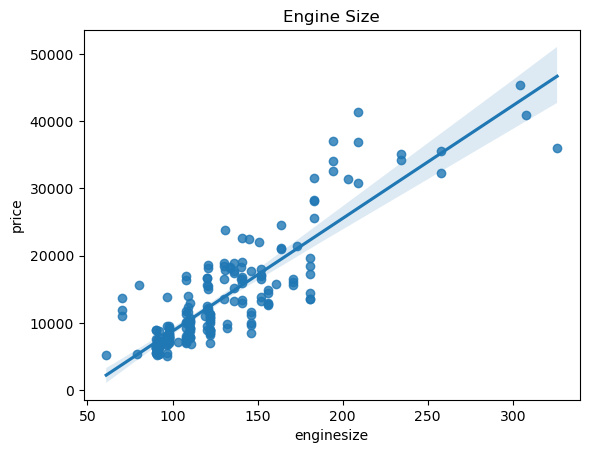

In [216]:
plt.title('Engine Size')
sns.regplot(x=data.enginesize, y=data.price)
plt.show()

**2- `rear` değişkeni enginelocation'dan geldi.**

enginelocation -> ['front', 'rear']

Buna göre motorun arkada olması fiyatı artırıyor.

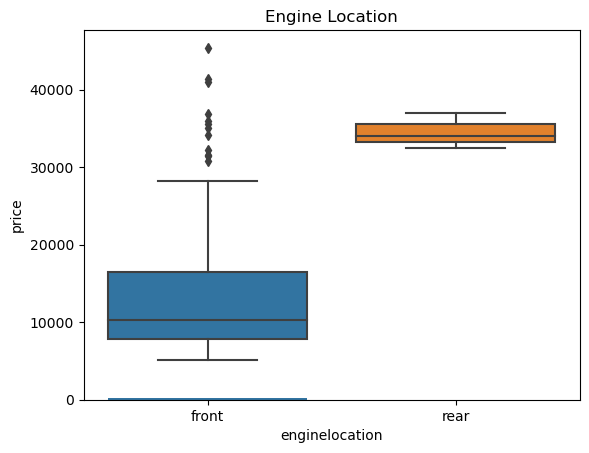

In [218]:
plt.title('Engine Location')
sns.countplot(data=data, x="enginelocation")
sns.boxplot(x=data.enginelocation, y=data.price)
plt.show()

**3- `curbweight` yani aracın ağırlığı fiyatı artırıyor.**

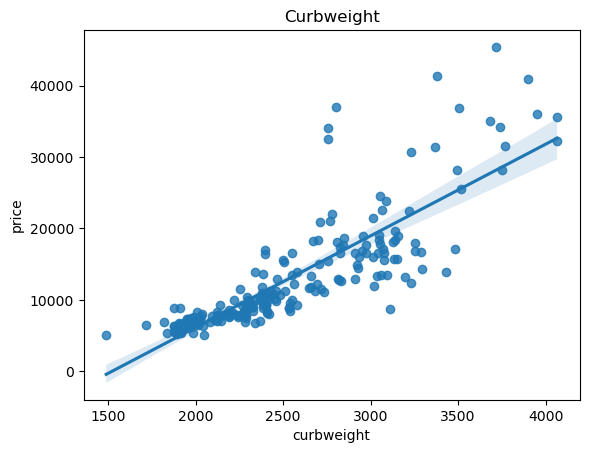

In [219]:
plt.title('Curbweight')
sns.regplot(x=data.curbweight, y=data.price)
plt.show()

**4- `horsepower` yani beygir gücü fiyatı artırıyor.**

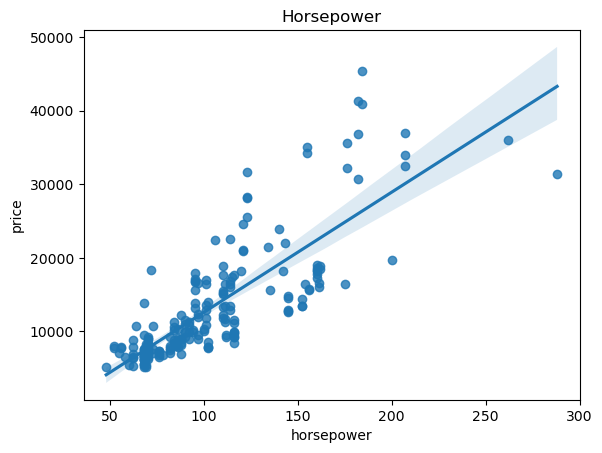

In [220]:
plt.title('Horsepower')
sns.regplot(x=data.horsepower, y=data.price)
plt.show()

**5- `four - six - twelve` değişkenleri `cylindernumber` dan geliyor.**

cylindernumber -> ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

baz değişken -> eight

Şu şekilde yorumlarız (baz değişken üzerinden):
* eight'i seçmeyip four'u seçersen: fiyattaki değişim -> -5822.569199
    
* eight'i seçmeyip six'u seçersen: fiyattaki değişim -> -5865.064165
    
* eight'i seçmeyip twelve'u seçersen: fiyattaki değişim -> -9547.252789

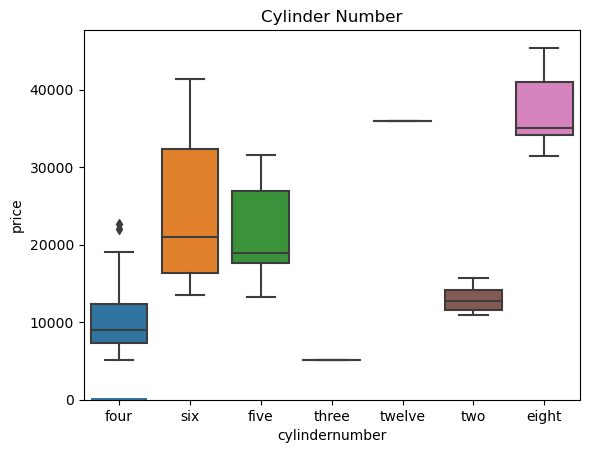

In [221]:
plt.title('Cylinder Number')
sns.countplot(data=data, x="cylindernumber")
sns.boxplot(x=data.cylindernumber, y=data.price)
plt.show()
